In [1]:
import numpy as np
import matplotlib
import pandas as pd


dataset = pd.read_csv('/Users/wzhang/Downloads/lake_erie_habs_W4_6_8_9_12_13_16_2013-2020.xlsx - HAB_data (1).csv')

train = dataset.iloc[:743,:]
test = dataset.iloc[743:,:]
print(train)
print(test)
X_train = pd.DataFrame(train.iloc[:,4:15].values)
Y_train = train.iloc[:,16:].values
print(X_train.shape)
print(Y_train.shape)
X_test = pd.DataFrame(test.iloc[:,4:15].values)
Y_test = test.iloc[:,16:].values
print(X_test.shape)
print(Y_test.shape)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


          Date  Site  Latitude (decimal deg)  Longitude (decimal deg)  \
0    5/29/2013   WE6                 41.7134                 -83.3804   
1    5/29/2013   WE8                 41.8343                 -83.3633   
2    5/29/2013   WE4                 41.8267                 -83.1930   
3    6/10/2013   WE6                 41.7144                 -83.3805   
4    6/10/2013   WE8                 41.8353                 -83.3631   
..         ...   ...                     ...                      ...   
738  10/7/2019  WE16                 41.6599                 -83.1467   
739  10/7/2019  WE13                 41.7428                 -83.1354   
740  10/7/2019  WE12                 41.7023                 -83.2639   
741  10/7/2019   WE4                 41.8270                 -83.1949   
742  6/16/2020   WE6                 41.7054                 -83.3864   

     Secchi Depth (m)  CTD Temperature (°C)  \
0                1.60                  18.5   
1                1.00        

In [2]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor

2024-07-01 14:52:42.544822: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In [16]:
# Initialize SVM regressor
svm_model = SVR(kernel='rbf', C=100000, gamma='scale')

# Train the model
svm_model.fit(X_train, Y_train)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100000)

In [17]:
res = svm_model.predict(X_test)
print(res)
print(res.shape)

[-5.19025842 41.6946303  -3.37197383  5.81064925 17.90562172 30.24227982
 26.96660045  8.81812201 10.60644624 26.80609914  4.9990923  22.15591924
 11.13271491 56.18349831  5.20468645 48.17020723  7.90720119 48.23149128
  7.79317366 34.51398954  6.82689956 56.11812529  7.3453323  11.22234267
  5.84176625 14.32875239 62.0457105  22.66200198 65.83998578  9.04921582
 16.38538694 38.22874186  3.50633626 26.66668389 19.67784411 37.59545934
 14.77446072 13.64600801 21.21954709  6.05086673 45.77569846 21.01785542
 76.09909678 26.62789394 13.89511891 14.34653292  4.96040656 48.0256031
 35.48928745 61.41799761 14.79136962 10.22521521  9.71333571 12.06020081
 26.5800072  32.42181395 61.20801707 17.50386248  9.09386629 23.29063245
  4.42995922 41.34807893 18.63052245 36.71103569 18.58601102  8.70513218
 18.76260842  4.25644474 37.30590686 21.45148542 15.3189982  18.26217965
 12.25910727 26.25594592  3.39192629 26.98035978 27.85134968 25.68827916
 14.19850311 17.95275538 25.08363801  4.27668739 11.

In [18]:
from sklearn.metrics import r2_score 
r2 = r2_score(Y_test, res) 
print(r2)

0.8058910673518639


In [7]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test,res)
print(mae)

5.894503607521002


In [8]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y_test,res)
print(mape)

0.5428184661165939


In [9]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(Y_test,res)
print(rmse)

8.561979267804535


In [10]:
import shap

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
import matplotlib.pyplot as plt 

In [12]:
X_test_shap = shap.sample(X_test,nsamples = 2)
explainer = shap.KernelExplainer(svm_model.predict, data=X_test_shap)
shap_values = explainer.shap_values(X_test)



100%|██████████| 96/96 [00:35<00:00,  2.67it/s]


In [13]:
features = pd.DataFrame(dataset.iloc[:,4:15])
features = features.columns
print(features)

Index(['Secchi Depth (m)', 'CTD Temperature (°C)',
       'CTD Specific Conductivity (µS/cm)', 'CTD Dissolved Oxygen (mg/L)',
       'Turbidity (NTU)', 'Total Phosphorus (µg P/L)',
       'Total Dissolved Phosphorus (µg P/L)', 'Ammonia (µg N/L)',
       'Nitrate + Nitrite (mg N/L)', 'Particulate Organic Carbon (mg/L)',
       'Particulate Organic Nitrogen (mg/L)'],
      dtype='object')


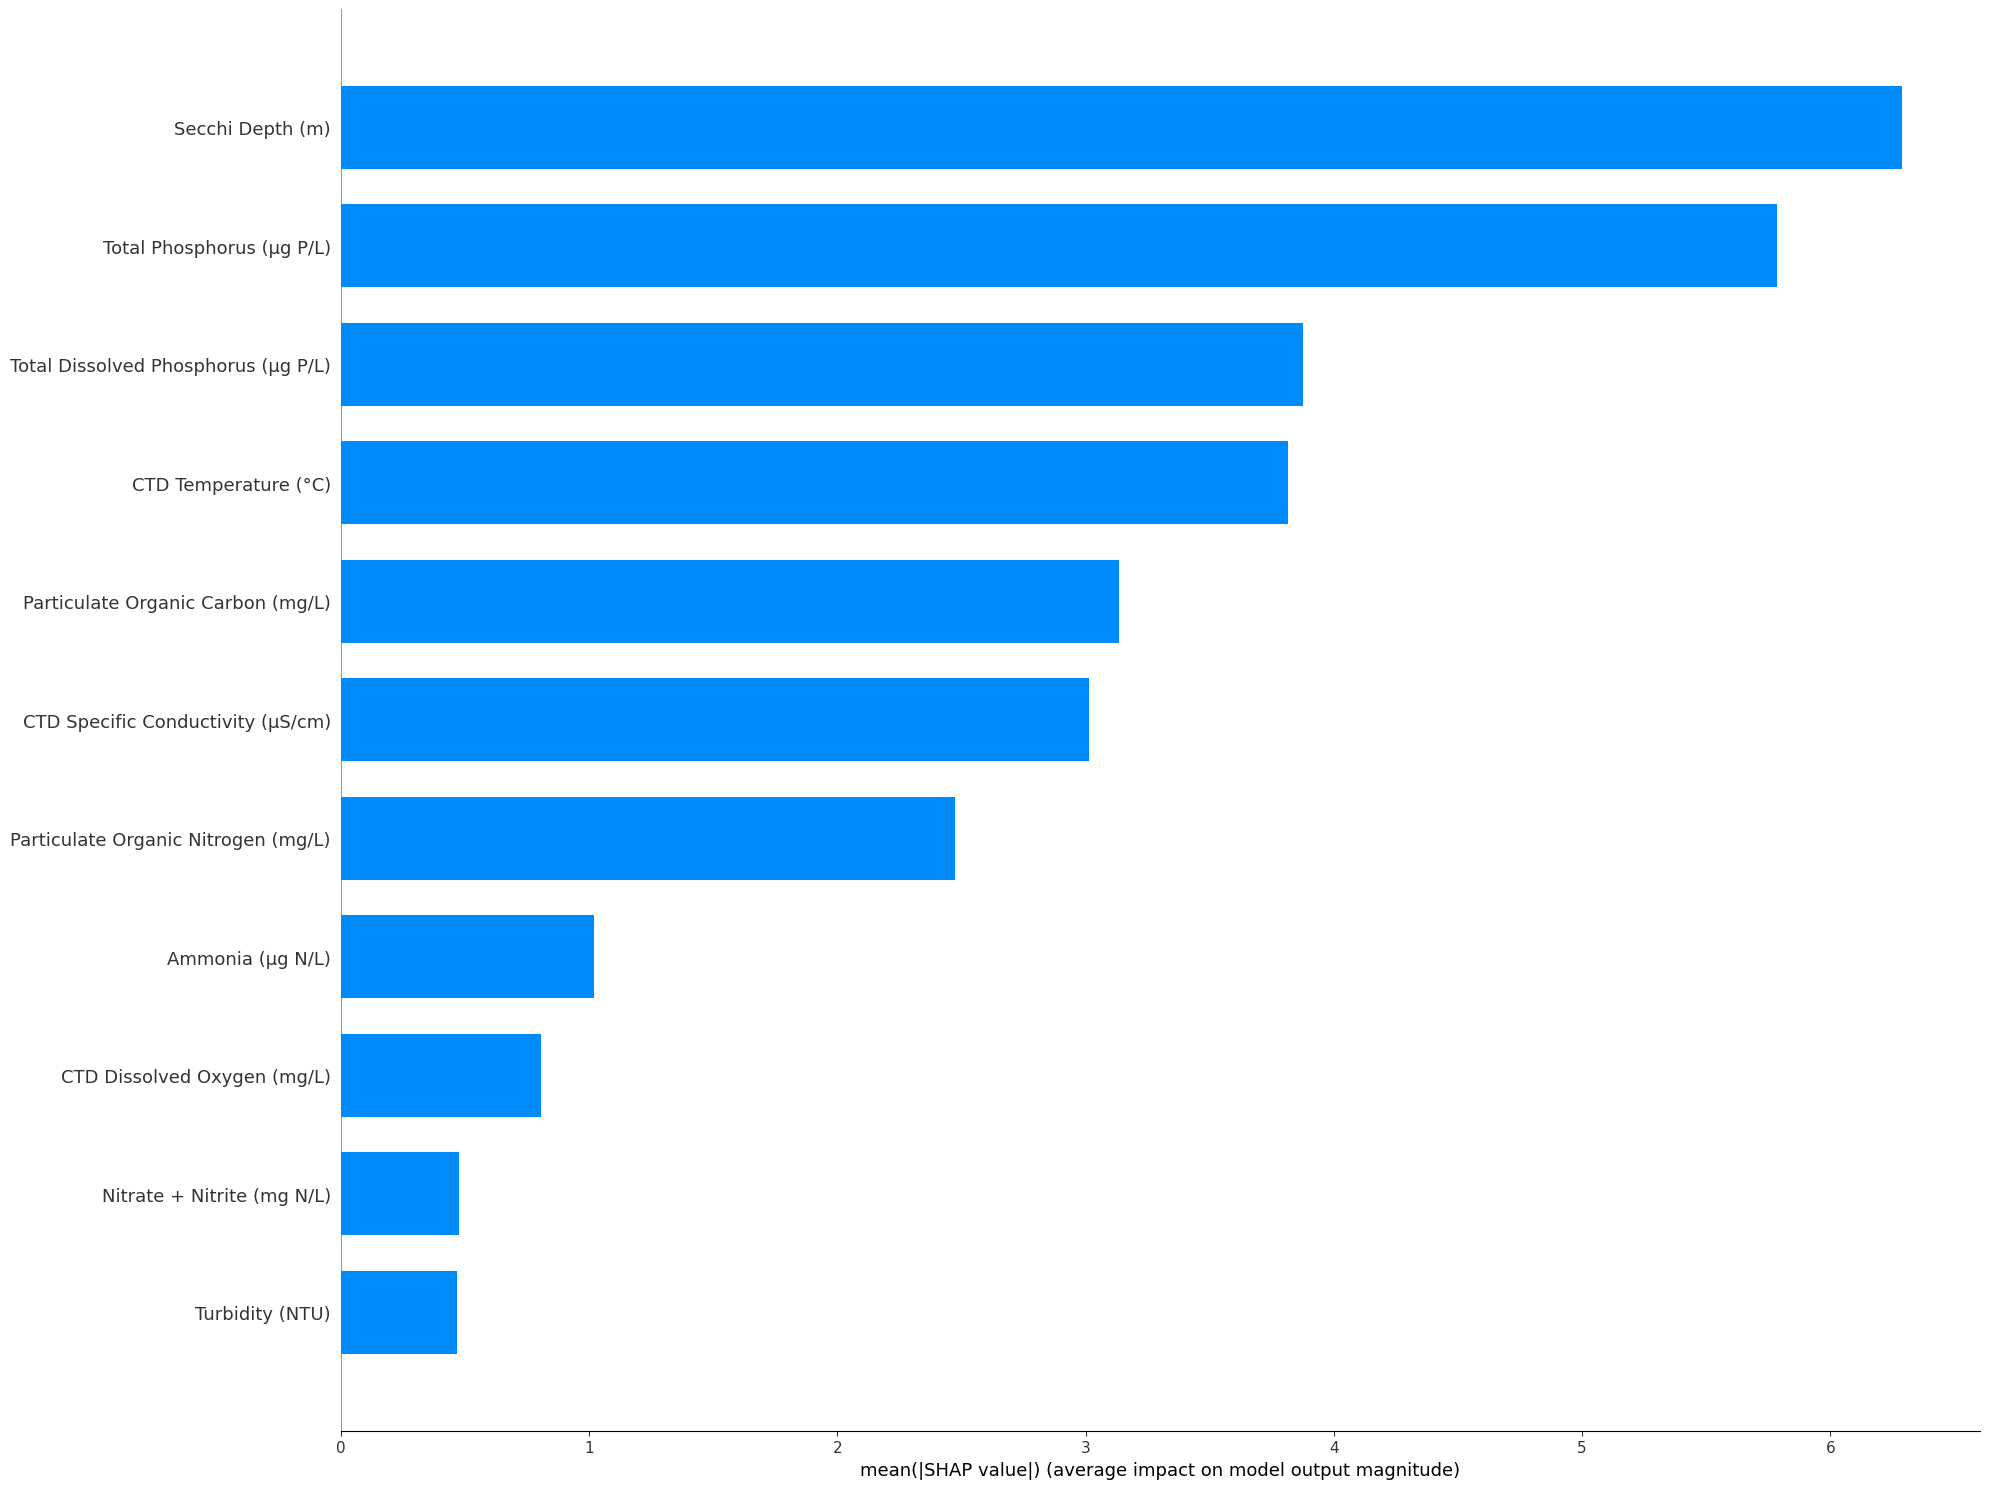

In [14]:
shap.summary_plot(shap_values,X_test_shap,feature_names = features,plot_type="bar", plot_size=(20,15),show=False)

100%|██████████| 96/96 [00:29<00:00,  3.26it/s]


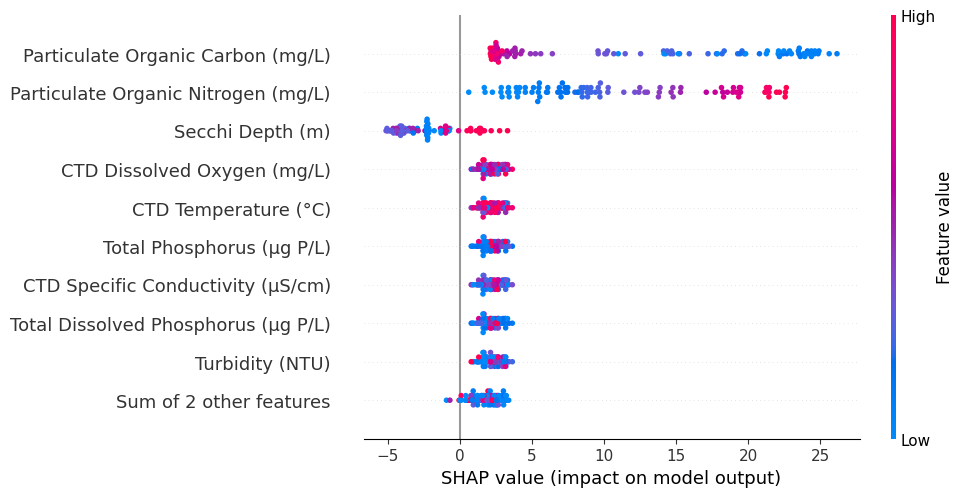

In [19]:
X_test_shap = pd.DataFrame(test.iloc[:,4:15])
shap_values = explainer(X_test_shap)
shap.plots.beeswarm(shap_values=shap_values)

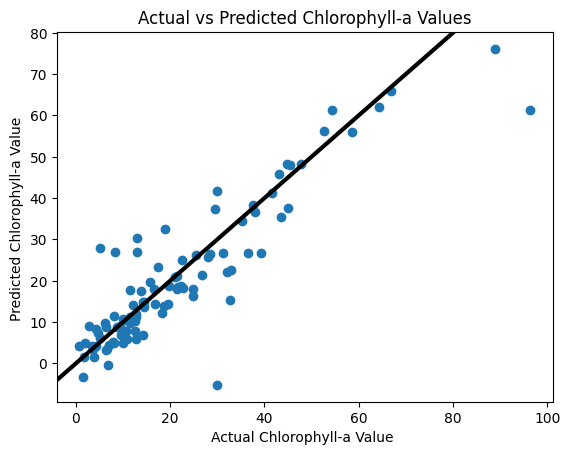

In [20]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, res)
plt.xlabel('Actual Chlorophyll-a Value ')
plt.ylabel('Predicted Chlorophyll-a Value ')
plt.title('Actual vs Predicted Chlorophyll-a Values')
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='-', color='k', lw=3, scalex=False, scaley=False)
plt.show()